<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08

<a id='p1'></a>
## I.- Problema 01


<img src="https://www.svgrepo.com/show/253022/car.svg" width = "300" align="center"/>



El conjunto de datos, denominado `vehiculos_procesado_con_grupos.csv`, contiene algunas de las características más importantes de los vehículos. El objetivo de este ejercicio es clasificar los vehículos en diferentes categorías, basándonos en las características que se describen a continuación.

El desafío de este ejercicio radica en la combinación de variables numéricas y categóricas, lo que añade complejidad al análisis.

Lo primero que haremos será cargar el conjunto de datos:

**Descripción de los Datos:**

| **Nombre de la Columna**   | **Descripción**                                                                                                                                   |
|----------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| **year**                   | El año en que el vehículo fue fabricado.                                                                                                          |
| **desplazamiento**          | La capacidad volumétrica del motor en litros. Indica la cantidad de aire y combustible que puede desplazar el motor durante una revolución.       |
| **cilindros**               | El número de cilindros que tiene el motor. Los cilindros son las cámaras donde ocurre la combustión interna en los motores de los vehículos.       |
| **co2**                     | Emisiones de dióxido de carbono del vehículo, medido en gramos por kilómetro. Es una medida de las emisiones de gases de efecto invernadero.       |
| **clase_tipo**              | La clase o tipo de vehículo, como vehículos especiales, deportivos, etc.                                                                         |
| **traccion_tipo**           | Tipo de tracción del vehículo, ya sea tracción en dos ruedas, en cuatro ruedas o en todas las ruedas.                                             |
| **transmision_tipo**        | Tipo de transmisión del vehículo, como automática, manual, entre otros.                                                                          |
| **combustible_tipo**        | Tipo de combustible que utiliza el vehículo, como gasolina, diésel, eléctrico, híbrido, etc.                                                     |
| **tamano_motor_tipo**       | Clasificación del tamaño del motor (por ejemplo, pequeño, mediano o grande), que generalmente se basa en la capacidad de desplazamiento.           |
| **consumo_tipo**            | Clasificación del nivel de consumo de combustible del vehículo, indicando si es alto, bajo, o muy alto.                                           |
| **co2_tipo**                | Clasificación de las emisiones de CO2 del vehículo, indicando si es alto, bajo, o muy alto.                                                       |
| **consumo_litros_milla**    | El consumo de combustible del vehículo, medido en litros por milla. Indica la eficiencia del vehículo en términos de consumo de combustible.        |



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline

sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2024/main/docs/labs/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante",
             "modelo",
             "transmision",
             "traccion",
             "clase",
             "combustible",
             "consumo"],

          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**.

1.1.- Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**

Veamos el tipo de datos que tiene este dataframe

In [5]:
df.dtypes

year                      int64
desplazamiento          float64
cilindros               float64
co2                     float64
clase_tipo               object
traccion_tipo            object
transmision_tipo         object
combustible_tipo         object
tamano_motor_tipo        object
consumo_tipo             object
co2_tipo                 object
consumo_litros_milla    float64
dtype: object

Como nos interesa normalizar todos los datos que son del tipo "float64" e "int64", podemos filtrar estos datos de la dataframe.

In [6]:
df_numcolumns = df.select_dtypes(include=['int64','float64']).columns
df_numfilter = df[df_numcolumns].copy()
df_numfilter.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984,2.5,4.0,522.764706,0.222671
1,1984,4.2,6.0,683.615385,0.291185
2,1985,2.5,4.0,555.437500,0.236588
3,1985,4.2,6.0,683.615385,0.291185
4,1987,3.8,6.0,555.437500,0.236588


Ahora, rellenemos los datos vacios con el promedio asociado a cada columna. Primero, veamos cuantos datos nulos tiene esta dataframe.

In [7]:
df_numfilter.isna().sum()

year                    0
desplazamiento          2
cilindros               3
co2                     0
consumo_litros_milla    0
dtype: int64

In [8]:
for column in df_numcolumns:
   mean=df_numfilter[column].mean()
   df_numfilter[column]=df_numfilter[column].fillna(mean)

df_numfilter.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984,2.5,4.0,522.764706,0.222671
1,1984,4.2,6.0,683.615385,0.291185
2,1985,2.5,4.0,555.437500,0.236588
3,1985,4.2,6.0,683.615385,0.291185
4,1987,3.8,6.0,555.437500,0.236588


In [9]:
df_numfilter.isna().sum()

year                    0
desplazamiento          0
cilindros               0
co2                     0
consumo_litros_milla    0
dtype: int64

Ahora, podemos usar el MinMaxScaler de sklearn para normalizar los datos.

In [10]:
scaler=MinMaxScaler()
df_numfilter[df_numcolumns]=scaler.fit_transform(df_numfilter[df_numcolumns])
df_numfilter.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.424351,0.360294


1.2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

Ahora, consideremos los datos no numericos. Como vimos anteriormente, estos datos tienen el atributo "object", luego podemos filtrar por este mismo tipo de dato.

In [11]:
df_objfilter=df.select_dtypes(include=['object'])
df_objfilter.head()

,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
0,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
1,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
2,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
3,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
4,Coches Medianos,dos,Automatica,Premium,grande,alto,alto


Ahora, transformemos las variables categoricas a numericas usando "get_dummies".

In [12]:
df_objdummies=pd.get_dummies(df_objfilter,dtype='int')
df_objdummies.head()

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


La manera que se transformó a variables numericas fue asignar una columna a cada entrada de cada columna. Luego, se coloca un 1 en la columna correspondiente al tipo original del dato y 0 en el resto de las columnas de esta categoría.

1.3.- Junte ambos dataset en uno, llamado **df_procesado**.

In [24]:
df_procesado=pd.concat([df_numfilter,df_objdummies],axis=1)
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas

2.1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.

In [25]:
X = np.array(df_procesado)
kmeans = KMeans(n_clusters=8,n_init=25, random_state=1)
kmeans.fit(X)

KMeans(n_init=25, random_state=1)

2.2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.

Primero, calculemos el valor de los centroides en cada cluster.

In [26]:
centroids = kmeans.cluster_centers_
clusters = kmeans.labels_

centroids_df = pd.DataFrame(centroids, columns=df_procesado.columns)
centroids_df["cluster"] = [1,2,3,4,5,6,7,8]

centroids_df


,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo,cluster
0,0.524326,0.250778,0.195544,0.304383,0.226563,6.235534e-02,0.095167,0.045745,0.153710,0.448468,...,9.768550e-01,5.551115e-17,-1.582068e-15,2.314500e-02,-1.748601e-15,9.933288e-01,5.309735e-03,-2.498002e-15,1.361470e-03,1
1,0.452443,0.562730,0.405562,0.501887,0.442585,4.354414e-01,0.001318,0.003953,0.010211,0.058300,...,3.080869e-15,5.599473e-03,9.367589e-01,-3.164136e-15,-3.053113e-16,6.938894e-16,2.942091e-15,1.000000e+00,2.026157e-15,2
2,0.476852,0.450916,0.327240,0.409956,0.343253,3.042549e-01,0.017105,0.041480,0.048535,0.150951,...,4.191092e-15,4.062433e-02,8.552491e-04,-4.246603e-15,9.950823e-01,6.414368e-04,6.414368e-04,3.634809e-03,2.386980e-15,3
3,0.409209,0.333730,0.257964,0.354182,0.281221,1.782721e-01,0.083817,0.093327,0.135558,0.182302,...,3.288201e-02,9.619600e-01,-3.275158e-15,5.157963e-03,1.450677e-03,6.447453e-04,9.979046e-01,-3.774758e-15,2.581269e-15,4
4,0.384236,0.585590,0.430797,0.510289,0.454503,2.592502e-01,0.005599,0.059153,0.059396,0.197420,...,2.192690e-15,1.168452e-02,9.571568e-01,-3.941292e-15,1.703992e-03,7.216450e-16,4.868549e-04,9.978092e-01,7.216450e-16,5
5,0.695702,0.179404,0.150728,0.240178,0.156814,-1.332268e-15,0.110189,0.027742,0.181747,0.546539,...,3.635980e-15,2.592689e-04,-1.998401e-15,9.997407e-01,-1.110223e-16,1.737101e-02,5.185377e-04,-3.608225e-16,9.821104e-01,6
6,0.438404,0.159576,0.141184,0.242287,0.156504,1.640712e-02,0.124861,0.006396,0.092881,0.709956,...,3.358425e-15,2.720046e-15,-1.748601e-15,1.000000e+00,-8.326673e-17,2.780868e-03,1.390434e-03,-2.220446e-16,9.958287e-01,7
7,0.588065,0.362121,0.299467,0.354068,0.282213,1.512097e-03,0.083921,0.086442,0.190020,0.561240,...,2.746976e-02,9.720262e-01,-2.664535e-15,-4.274359e-15,2.318548e-02,7.216450e-16,9.768145e-01,-2.914335e-15,2.303713e-15,8


Ahora, asignemos a cada dato su respectivo cluster.

In [27]:
df_procesado["cluster"] = clusters
df_procesado["cluster"] = df_procesado["cluster"].astype('category')

df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo,cluster
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,4
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,4
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2


2.3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:

    * Valor promedio de las variables numérica
    * Moda para las variables numericas

Primero, agrupemos los datos por su variable numerica y por cluster, y veamos el valor promedio de las variables numericas.

In [28]:
df_numcolumns_cluster=np.append(df_numcolumns,np.array(['cluster'],dtype='object'))
df_procesado_num_mean=df_procesado[df_numcolumns_cluster].groupby('cluster').mean().reset_index()
df_procesado_num_mean

C:\Users\vmore\AppData\Local\Temp\ipykernel_15524\1971423045.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_procesado_num_mean=df_procesado[df_numcolumns_cluster].groupby('cluster').mean().reset_index()


,cluster,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0,0.524326,0.250778,0.195544,0.304383,0.226563
1,1,0.452443,0.562730,0.405562,0.501887,0.442585
2,2,0.476852,0.450916,0.327240,0.409956,0.343253
3,3,0.409209,0.333730,0.257964,0.354182,0.281221
4,4,0.384236,0.585590,0.430797,0.510289,0.454503
5,5,0.695702,0.179404,0.150728,0.240178,0.156814
6,6,0.438404,0.159576,0.141184,0.242287,0.156504
7,7,0.588065,0.362121,0.299467,0.354068,0.282213


Ahora, veamos la moda para las variables numericas. Para esto, revisaremos para cluster la moda de cada columna por separado.

In [29]:
df_procesado_num_mode=df_procesado_num_mean.copy()
for i in range(8):
    for column in df_numcolumns:
        df_procesado_num_mode.at[i,column]=df_procesado[[column,'cluster']].loc[df_procesado['cluster']==i].mode().iloc[0][column]

df_procesado_num_mode

,cluster,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0,0.823529,0.179487,0.142857,0.317749,0.241830
1,1,0.558824,0.653846,0.428571,0.454199,0.393464
2,2,0.029412,0.474359,0.285714,0.424351,0.331027
3,3,0.000000,0.307692,0.285714,0.374603,0.305011
4,4,0.000000,0.564103,0.428571,0.454199,0.393464
5,5,0.970588,0.179487,0.142857,0.275108,0.194444
6,6,0.029412,0.179487,0.142857,0.275108,0.194444
7,7,0.617647,0.307692,0.285714,0.374603,0.281734


### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una vez realizado el gráfico, saque sus propias conclusiones del caso.

Al observar el gráfico resultante, se pueden obtener conclusiones sobre el número apropiado de clusters. La regla del codo sugiere elegir el número de clusters donde la reducción en la inercia se estabiliza significativamente. En otras palabras, se busca el punto en el gráfico donde la curva de inercia comienza a aplanarse o forma un codo.

In [30]:
Nc = [5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i, n_init=10) for i in Nc]  # Suppressing the warning here
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]

df_Elbow = pd.DataFrame({'Number of Clusters': Nc, 'Score': score})

df_Elbow

,Number of Clusters,Score
0,5,120410.268141
1,10,83273.996974
2,20,67199.889302
3,30,57076.924451
4,50,45291.525076
5,75,36757.203861
6,100,30826.814281
7,200,17859.231350
8,300,11411.667572


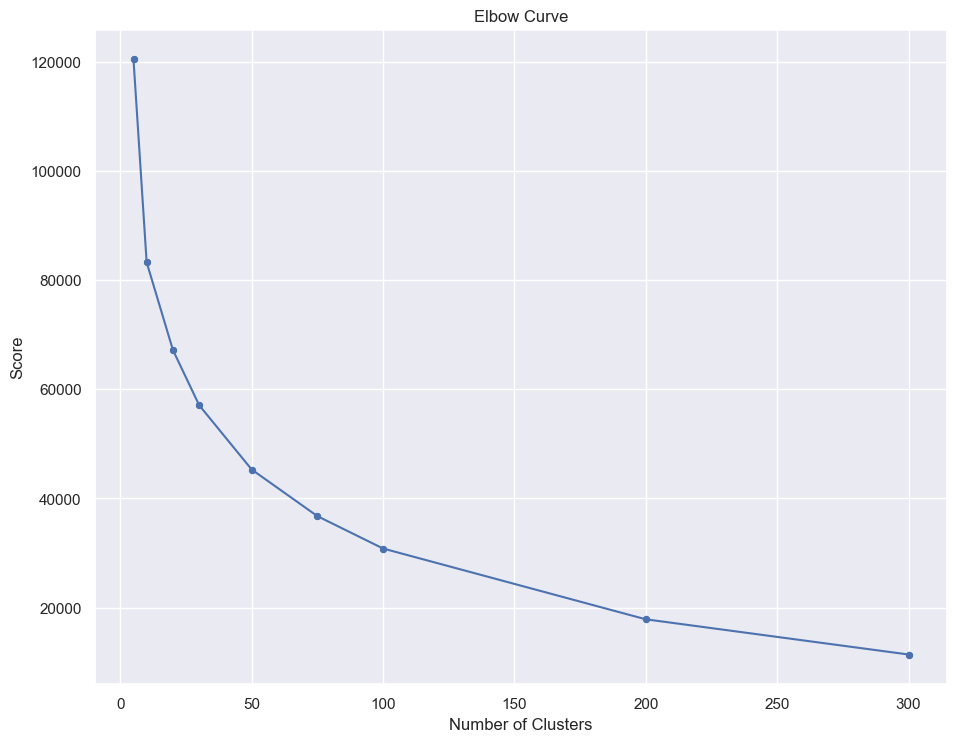

In [31]:
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)
plt.show()

Según la regla del codo, convendría escoger aproximadamente 50 clusters, pues la reducción en la suma total de cuadrados internos parece estabilizarse.

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases).



In [32]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [33]:
dataset = load_iris()

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'
iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris['species'] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

Primero, veamos la media y varianza de los datos.

In [35]:
iris.mean(axis=0)

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
species         1.000000
dtype: float64

In [36]:
iris.var(axis=0)

sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
species         0.671141
dtype: float64

Vamos a realizar una estandarización de estos datos sin su especie, y vamos a aplicar el algoritmo PCA a este conjunto de datos.

In [37]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())

iris_nospecies=iris.drop(columns='species')
pca_pipe.fit(iris_nospecies)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = iris_nospecies.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4']
)

,sepal_length,sepal_width,petal_length,petal_width
PC1,0.521066,-0.269347,0.580413,0.564857
PC2,0.377418,0.923296,0.024492,0.066942
PC3,0.719566,-0.244382,-0.142126,-0.634273
PC4,-0.261286,0.123510,0.801449,-0.523597


Ahora, podemos ver la influencia de las variables en cada componente visualmente con un heatmap.

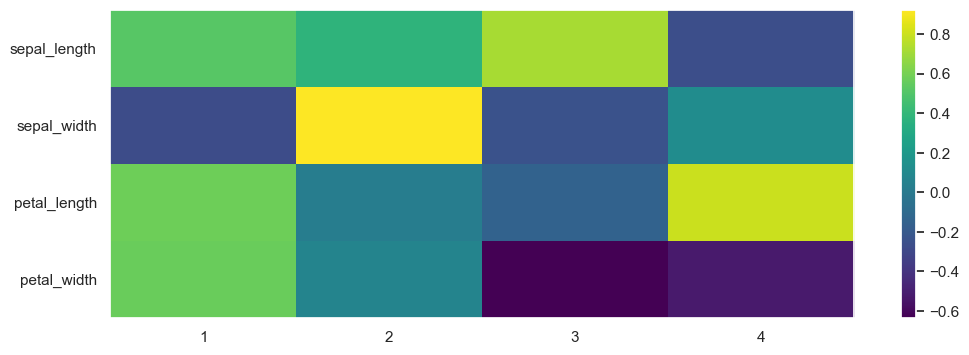

In [38]:
# Heatmap componentes
# ==============================================================================
plt.figure(figsize=(12,4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(iris_nospecies.columns)), iris_nospecies.columns)
plt.xticks(range(len(iris_nospecies.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

Y ahora, como conocemos las varianzas explicadas por cada auna de ellas, podemos visualizar la proporción con respecto al total y la proporción de varianza acumulada.

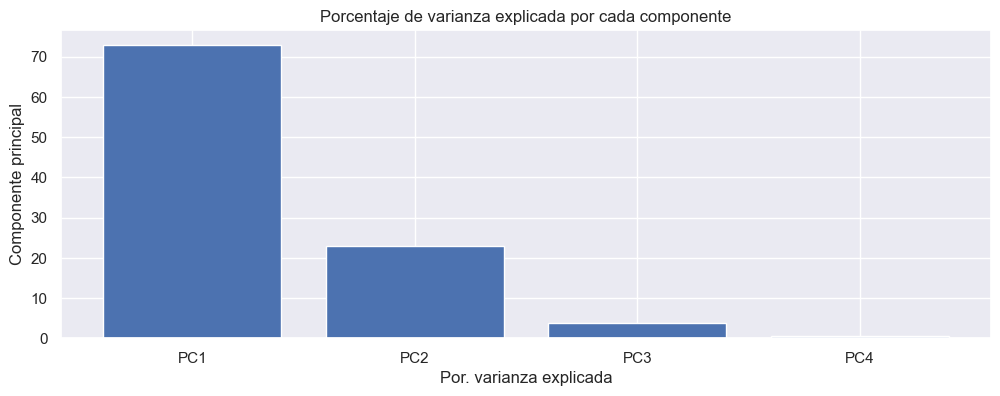

In [40]:
# graficar varianza por componente
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,5), height=percent_variance, tick_label=columns)
plt.xticks(np.arange(modelo_pca.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

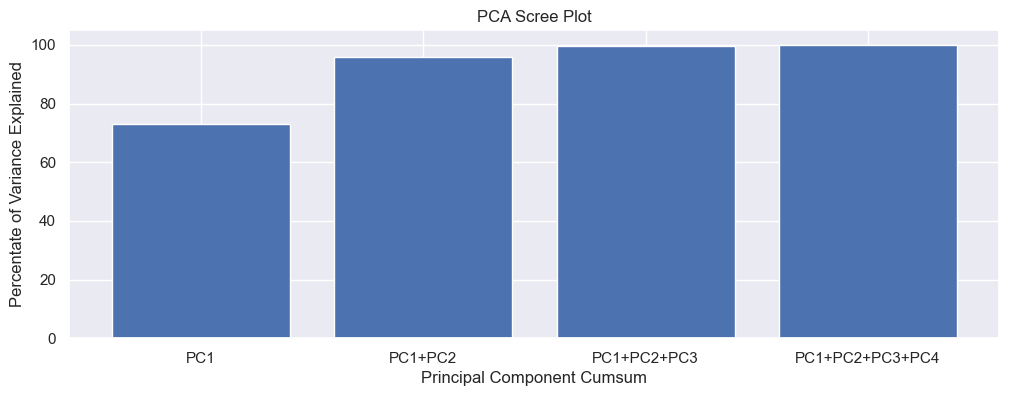

In [41]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 'PC1+PC2', 'PC1+PC2+PC3', 'PC1+PC2+PC3+PC4']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,5), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

Notemos que, con las primeras dos componentes podemos explicar sobre el 95% de la varianza observada, y con las primeras tres podemos explicar más del 99% de la varianza observada. Luego, podemos considerar las dos primeras componentes para explicar bastante bien el conjunto de datos, reduciendo en 2 la dimensionalidad de los datos originales.

In [52]:
reduced_data = modelo_pca.transform(iris_nospecies)[:, :2] 
reduced_df = pd.DataFrame(data=reduced_data, columns=['PC1', 'PC2'])
reduced_df.head()

C:\Users\vmore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


,PC1,PC2
0,2.640270,5.204041
1,2.670730,4.666910
2,2.454606,4.773636
3,2.545517,4.648463
4,2.561228,5.258629


Y ahora, podemos visualizar los clusters. Notemos que, si graficamos los primeros dos datos del dataframe se ven de la siguiente forma:

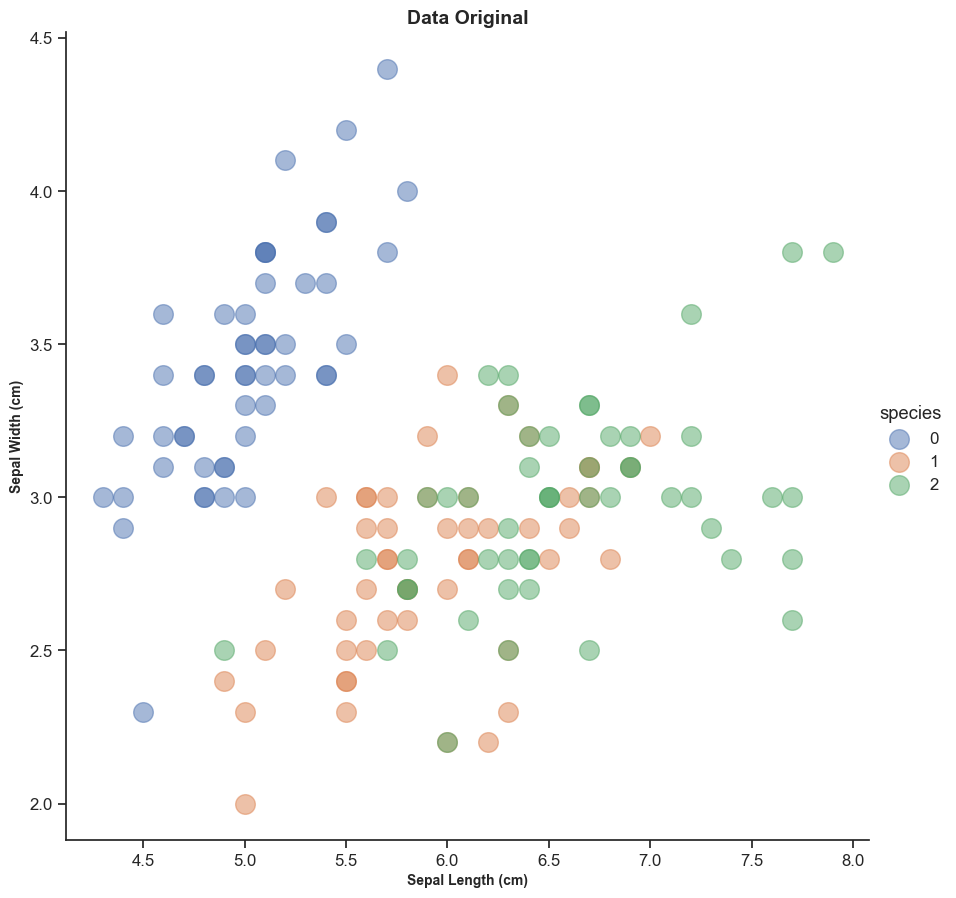

In [93]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='sepal_length',
           y='sepal_width',
           data=iris,
           fit_reg=False,
           legend=True,
           height=9,
           hue='species',
           scatter_kws={"s":200, "alpha":0.5})

plt.title('Data Original', weight='bold').set_fontsize('14')
plt.xlabel('Sepal Length (cm)', weight='bold').set_fontsize('10')
plt.ylabel('Sepal Width (cm)', weight='bold').set_fontsize('10')

Luego, la data reducida obtenida mediante el método PCA se visualiza de la siguiente forma:

In [85]:
# PCA
scaler = StandardScaler()

X = iris.drop(columns='species')
y = iris['species']
    
embedding = PCA(n_components=2)
X_transform = embedding.fit_transform(X)
    
df_pca = pd.DataFrame(X_transform,columns = ['Score1','Score2'])
df_pca['label'] = y

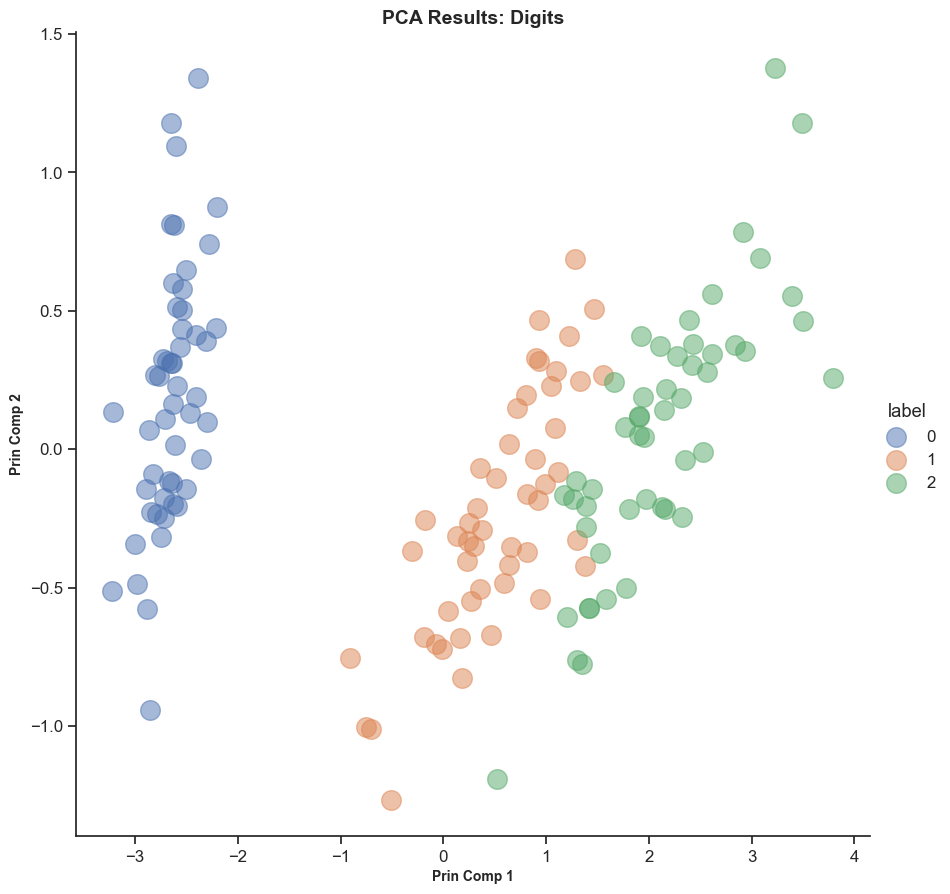

In [91]:
# Plot Digits PCA


# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='Score1',
           y='Score2',
           data=df_pca,
           fit_reg=False,
           legend=True,
           height=9,
           hue='label',
           scatter_kws={"s":200, "alpha":0.5})

plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

Podemos ver como este método logra separar parcialmente los clusters de la data original. Ahora, hagamos lo mismo con los mismos pasos con el algoritmo t-SNE, también con las primeras dos componentes principales para ver cual logra la mejor separación.

In [83]:
# tsne
scaler = StandardScaler()

X = iris.drop(columns='species')
y = iris['species']
    
embedding = TSNE(n_components=2)
X_transform = embedding.fit_transform(X)
    
df_tsne = pd.DataFrame(X_transform,columns = ['_DIM_1_','_DIM_2_'])
df_tsne['label'] = y

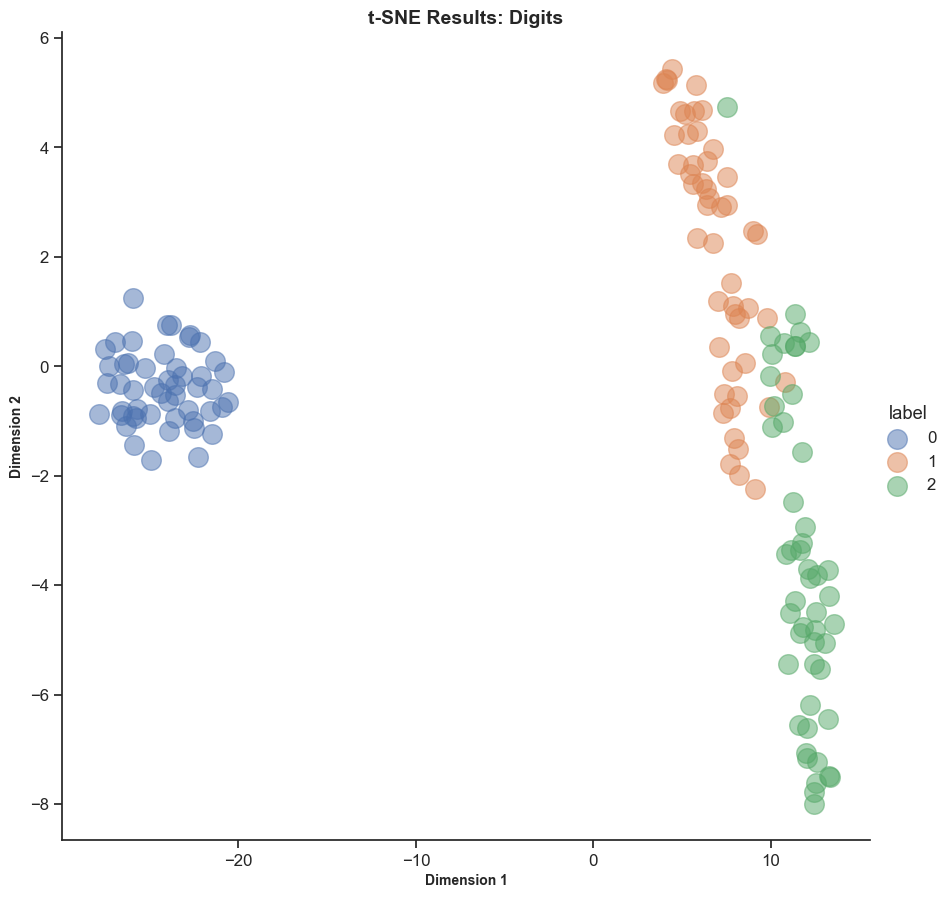

In [92]:
# Plot Digits t-SNE
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=df_tsne,
           fit_reg=False,
           legend=True,
           height=9,
           hue='label',
           scatter_kws={"s":200, "alpha":0.5})

plt.title('t-SNE Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

# Conclusiones

Podemos ver como en ambos gráficos cada especie logró separarse más con el algoritmo t-SNE que con el algoritmo PCA. Luego, sería mejor ocupar el algoritmo t-SNE que el algoritmo PCA para separar en clusters la data original. Eso si, notemos que el algoritmo t-SNE alejó del cluster "2" uno de sus datos, acercandolo más al cluster "1". Este error no ocurrió con el algoritmo PCA.